In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import umap
import phenograph

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [4]:
region = 'OB'
compute_response = False
if compute_response:
    all_dfovf_select = pd.read_pickle('../../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))

    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select, time_window, frame_rate)
    all_response.to_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
    all_response

In [5]:
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))

H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = dtpar.cond_list
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_idx = train_cond.map(cond_order)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
k=40
communities_raw, graph, Q = phenograph.cluster(data, k=k)
communities_raw = communities_raw + 1 # so that cluster id starts from 1

Finding 40 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 15.559523820877075 seconds
Jaccard graph constructed in 2.6600775718688965 seconds


/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


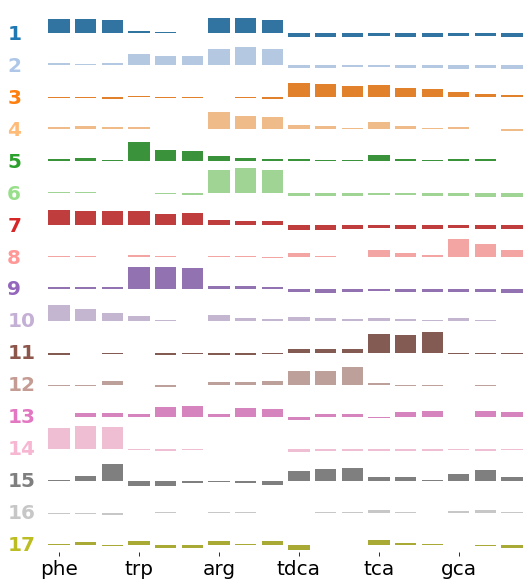

In [35]:
cluster_mean_df_raw = caclust.get_cluster_mean_df(H, communities_raw)
fig = caclust.plot_cluster_tuning(cluster_mean_df_raw, cmap="tab20")
fig_dir = "/home/hubo/Projects/Ca_imaging/results/JH_analysis/figures"
fig.savefig(os.path.join(fig_dir, "cluster_mean.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:4.269e-01 t=8.250e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:1.435e-02 t=-2.904e+00
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:3.843e-01 t=-9.061e-01
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:1.336e-01 t=-1.620e+00
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:2.859e-01 t=-1.122e+00
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:1.892e-01 t=-1.400e+00
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:3.511e-01 t=9.738e-01
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:4.719e-01 t=7.450e-01
14_arg-phe vs. 14_phe-trp: t-test independent samples, P_val:5.629e-01 t=-5.966e-01
15_arg-phe vs. 15_phe-trp: t-test independent samples, P_val:2.613e-01 t=1

16_phe-arg vs. 16_naive: t-test independent samples, P_val:4.491e-01 t=-7.825e-01
17_phe-arg vs. 17_naive: t-test independent samples, P_val:2.489e-01 t=-1.212e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:1.435e-02 t=-2.904e+00
3_phe-arg vs. 3_arg-phe: t-test independent samples, P_val:1.695e-02 t=-2.665e+00
15_phe-arg vs. 15_arg-phe: t-test independent samples, P_val:1.299e-02 t=-3.016e+00
7_phe-arg vs. 7_phe-trp: t-test independent samples, P_val:9.287e-03 t=-3.051e+00


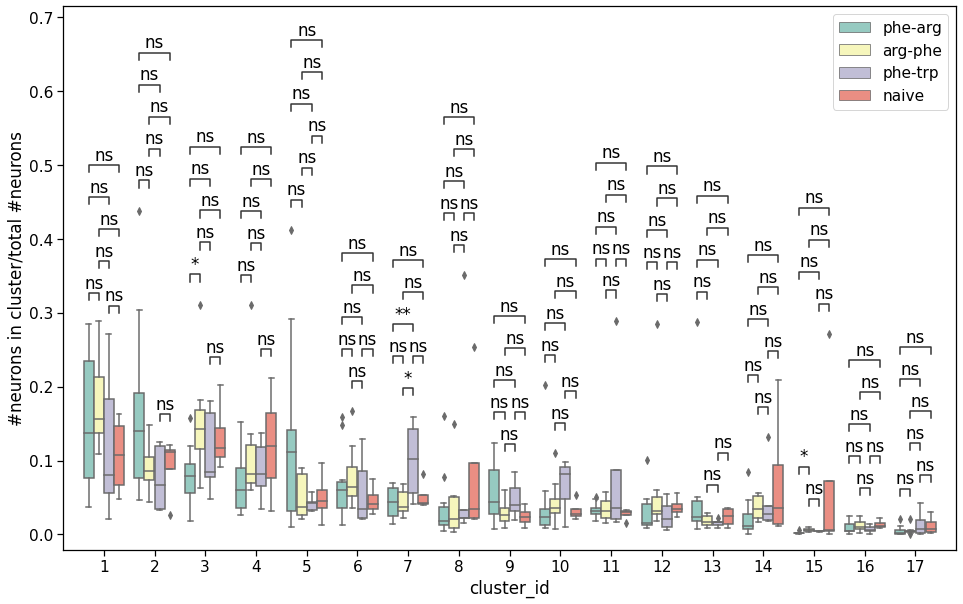

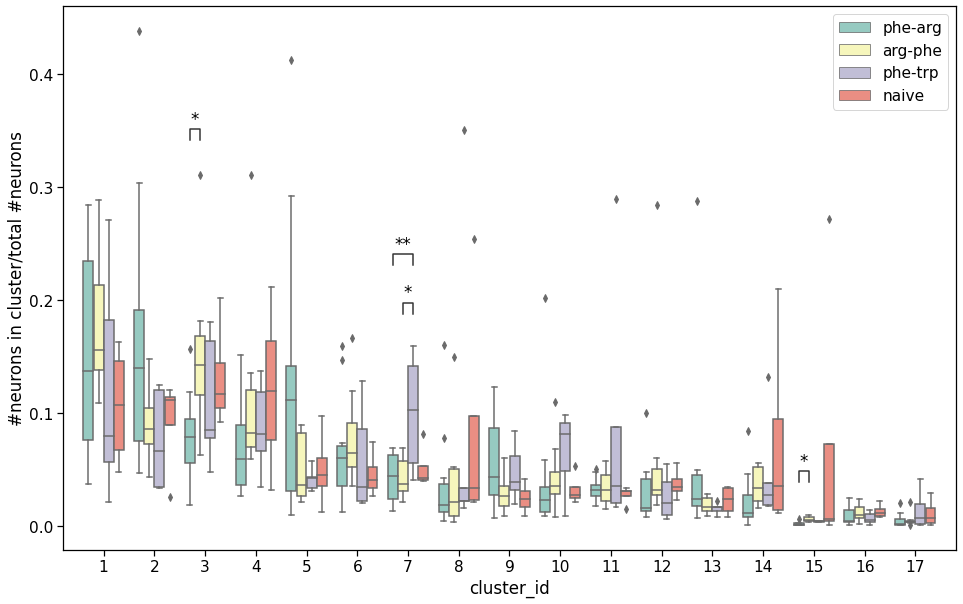

In [37]:
importlib.reload(caclust)
from itertools import combinations
labels = communities_raw


n_clusters = len(np.unique(labels))
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(1, n_clusters+1):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df

annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)
fig2.savefig(os.path.join(fig_dir, "cluster_cont.svg"))

In [38]:
cluster_df.to_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [39]:
cluster_df = pd.read_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [40]:
# Map cluster ID to neuron coordinates in the anatomy
from skimage.io import imread, imsave
expname = '2021-07-31-DpOBEM-JH17'
roi_stack_file = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/2021-07-31-DpOBEM-JH17/OB/roi/roi_stack.tif'
roi_stack = imread(roi_stack_file)

In [41]:
import catrace.nrn_coord as caroi
importlib.reload(caroi)
from catrace.nrn_coord import import_roi_stack, draw_stack, assign_meta, show_stack

In [42]:
rois= import_roi_stack(roi_stack)

In [43]:
meta_df = cluster_df.loc[cluster_df['fish_id'] == expname]
meta_df

,fish_id,plane,neuron,cluster_id,train_cond
11450,2021-07-31-DpOBEM-JH17,0,3,3,arg-phe
11451,2021-07-31-DpOBEM-JH17,0,8,1,arg-phe
11452,2021-07-31-DpOBEM-JH17,0,14,3,arg-phe
11453,2021-07-31-DpOBEM-JH17,0,22,12,arg-phe
11454,2021-07-31-DpOBEM-JH17,0,25,3,arg-phe
...,...,...,...,...,...
12156,2021-07-31-DpOBEM-JH17,3,188,6,arg-phe
12157,2021-07-31-DpOBEM-JH17,3,189,6,arg-phe
12158,2021-07-31-DpOBEM-JH17,3,190,1,arg-phe
12159,2021-07-31-DpOBEM-JH17,3,193,6,arg-phe


In [44]:
rois = assign_meta(rois, meta_df, 'cluster_id')

Skip ROI # 0 in plane 0
Skip ROI # 15 in plane 0
Skip ROI # 18 in plane 0
Skip ROI # 21 in plane 0
Skip ROI # 24 in plane 0
Skip ROI # 26 in plane 0
Skip ROI # 27 in plane 0
Skip ROI # 29 in plane 0
Skip ROI # 31 in plane 0
Skip ROI # 36 in plane 0
Skip ROI # 38 in plane 0
Skip ROI # 44 in plane 0
Skip ROI # 52 in plane 0
Skip ROI # 53 in plane 0
Skip ROI # 60 in plane 0
Skip ROI # 71 in plane 0
Skip ROI # 72 in plane 0
Skip ROI # 78 in plane 0
Skip ROI # 82 in plane 0
Skip ROI # 84 in plane 0
Skip ROI # 86 in plane 0
Skip ROI # 96 in plane 0
Skip ROI # 119 in plane 0
Skip ROI # 132 in plane 0
Skip ROI # 136 in plane 0
Skip ROI # 140 in plane 0
Skip ROI # 143 in plane 0
Skip ROI # 148 in plane 0
Skip ROI # 155 in plane 0
Skip ROI # 157 in plane 0
Skip ROI # 160 in plane 0
Skip ROI # 161 in plane 0
Skip ROI # 163 in plane 0
Skip ROI # 166 in plane 0
Skip ROI # 180 in plane 0
Skip ROI # 182 in plane 0
Skip ROI # 187 in plane 0
Skip ROI # 201 in plane 0
Skip ROI # 206 in plane 0
Skip ROI 

Skip ROI # 316 in plane 3
Skip ROI # 317 in plane 3
Skip ROI # 322 in plane 3
Skip ROI # 324 in plane 3
Skip ROI # 328 in plane 3
Skip ROI # 338 in plane 3
Skip ROI # 341 in plane 3
Skip ROI # 342 in plane 3
Skip ROI # 345 in plane 3
Skip ROI # 355 in plane 3
Skip ROI # 358 in plane 3
Skip ROI # 363 in plane 3
Skip ROI # 364 in plane 3
Skip ROI # 366 in plane 3
Skip ROI # 379 in plane 3
Skip ROI # 383 in plane 3
Skip ROI # 391 in plane 3
Skip ROI # 393 in plane 3
Skip ROI # 400 in plane 3
Skip ROI # 401 in plane 3
Skip ROI # 405 in plane 3
Skip ROI # 409 in plane 3
Skip ROI # 410 in plane 3
Skip ROI # 419 in plane 3
Skip ROI # 422 in plane 3
Skip ROI # 424 in plane 3
Skip ROI # 429 in plane 3
Skip ROI # 432 in plane 3
Skip ROI # 441 in plane 3
Skip ROI # 446 in plane 3
Skip ROI # 448 in plane 3
Skip ROI # 450 in plane 3
Skip ROI # 454 in plane 3
Skip ROI # 459 in plane 3
Skip ROI # 460 in plane 3
Skip ROI # 461 in plane 3
Skip ROI # 462 in plane 3
Skip ROI # 477 in plane 3
Skip ROI # 4

Skip ROI # 118 in plane 6
Skip ROI # 120 in plane 6
Skip ROI # 123 in plane 6
Skip ROI # 125 in plane 6
Skip ROI # 127 in plane 6
Skip ROI # 128 in plane 6
Skip ROI # 130 in plane 6
Skip ROI # 135 in plane 6
Skip ROI # 140 in plane 6
Skip ROI # 146 in plane 6
Skip ROI # 147 in plane 6
Skip ROI # 149 in plane 6
Skip ROI # 151 in plane 6
Skip ROI # 153 in plane 6
Skip ROI # 155 in plane 6
Skip ROI # 156 in plane 6
Skip ROI # 157 in plane 6
Skip ROI # 164 in plane 6
Skip ROI # 166 in plane 6
Skip ROI # 167 in plane 6
Skip ROI # 169 in plane 6
Skip ROI # 173 in plane 6
Skip ROI # 176 in plane 6
Skip ROI # 177 in plane 6
Skip ROI # 182 in plane 6
Skip ROI # 185 in plane 6
Skip ROI # 191 in plane 6
Skip ROI # 0 in plane 7
Skip ROI # 1 in plane 7
Skip ROI # 2 in plane 7
Skip ROI # 21 in plane 7
Skip ROI # 29 in plane 7
Skip ROI # 33 in plane 7
Skip ROI # 35 in plane 7
Skip ROI # 39 in plane 7
Skip ROI # 43 in plane 7
Skip ROI # 55 in plane 7
Skip ROI # 57 in plane 7
Skip ROI # 59 in plane 7
S

In [45]:
importlib.reload(caroi)
from catrace.nrn_coord import draw_stack
clust_stack = draw_stack(rois, roi_stack.shape, 'cluster_id')

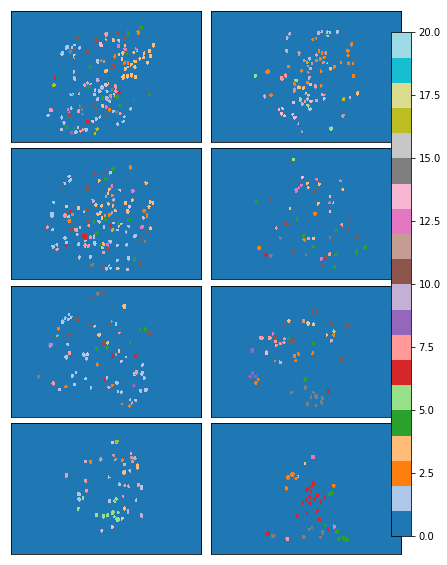

In [46]:
importlib.reload(caroi)
from catrace.nrn_coord import show_stack
matshow_kwargs = dict(vmin=0, vmax=20, cmap='tab20')
fig = show_stack(clust_stack, figsize=(7, 10), matshow_kwargs=matshow_kwargs)

In [31]:
clust_stack_file = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/2021-07-31-DpOBEM-JH17/OB/analysis/cluster_stack.tif'
imsave(clust_stack_file, clust_stack)